In [11]:
import seaborn as sb
import pandas as pd
import numpy as np
import time
import os
import itertools
import matplotlib.pyplot as plt

class PrepareExperiment():
    def __init__(self, id, home="."):
        self.id = id
        self.home=home        
        self.expHome = None
        self.images = None
        self.plots = None
        self._prepare_foldiers()
    
    def _prepare_foldiers(self):
        dirname = self.unique_name(self.home + "/experiments/experiment",makedir=True)
        images = dirname+"/images"
        plots = dirname+"/plots"       
        os.makedirs(dirname)        
        os.makedirs(images)
        os.makedirs(plots)
        self.expHome = dirname+"/"
        self.images = images+"/"
        self.plots = plots+"/"
        
        

    @staticmethod
    def unique_name(basename, ext=None, makedir=False):
        c = itertools.count()
        if makedir:
            actualname = "%s" % basename
            while os.path.exists(actualname):
                actualname = "%s_%d" % (basename, next(c))
        else:
            actualname = "%s.%s" % (basename, ext)    
            while os.path.exists(actualname):
                actualname = "%s_%d.%s" % (basename, next(c),ext)
        return actualname     

env = PrepareExperiment(1)
print(env.images)
print(env.expHome)

d = pd.DataFrame({"a":[],"b":[]})
print(d)
b = pd.DataFrame({"a":[1],"b":[2]})
d = d.append(b)
print(d)
print(int(time.time()))


./experiments/experiment_7/images/
./experiments/experiment_7/
Empty DataFrame
Columns: [a, b]
Index: []
     a    b
0  1.0  2.0
1535065496


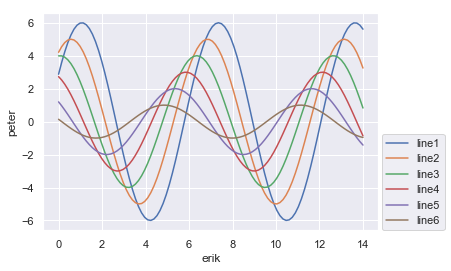

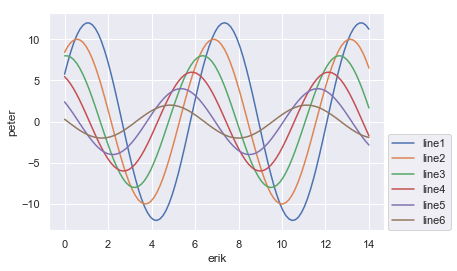

In [119]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip,label="line"+str(i))
        plt.xlabel("erik")
        plt.ylabel("peter")
        plt.legend(loc=(1.01,0))
    
    
plt.figure(1)
plt1 = sinplot()

plt.figure(2)
plt2 = sinplot(flip=2)


<class 'pandas.core.frame.DataFrame'>
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
5    25.29
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: float64


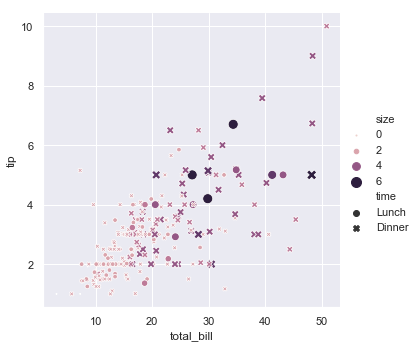

In [120]:


data = sb.load_dataset("tips")
print(type(data))
print(data[:10])
print(data["total_bill"][:10])

sb.relplot(x="total_bill", y="tip",hue="size",style="time",
           size="size",data=data,sizes=(1,100))

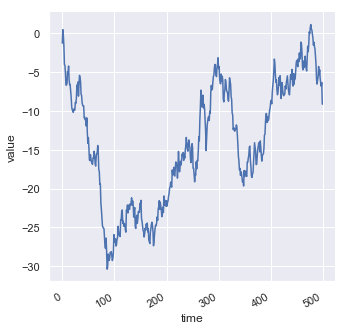

In [121]:
data1 = pd.DataFrame(dict(time=np.arange(500),
                         value = np.random.randn(500).cumsum()))

graph = sb.relplot(x="time",y="value",kind="line",data=data1)
graph.fig.autofmt_xdate()

If X value has multiple measurements seaborn will by default aggregate them and plot the mean and 95% confidence interval

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
5      s9         18  stim  parietal -0.103513
6      s8         18  stim  parietal -0.064408
7      s7         18  stim  parietal -0.060526
8      s6         18  stim  parietal -0.007029
9      s5         18  stim  parietal -0.040557


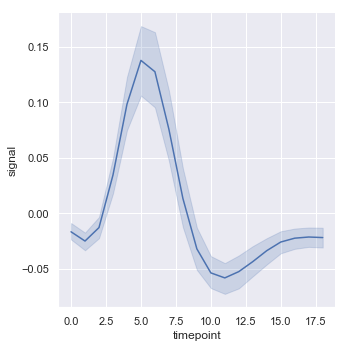

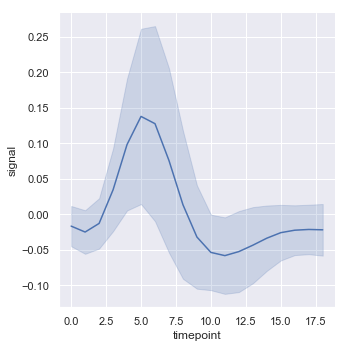

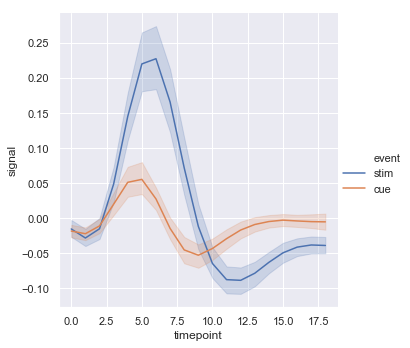

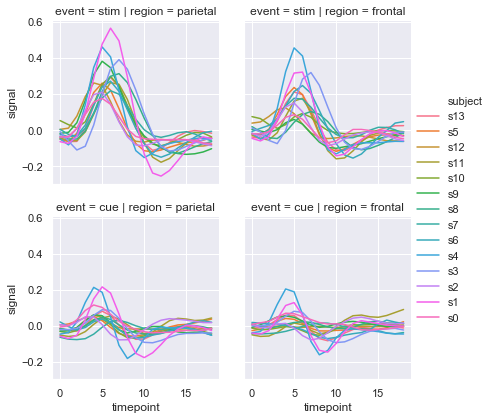

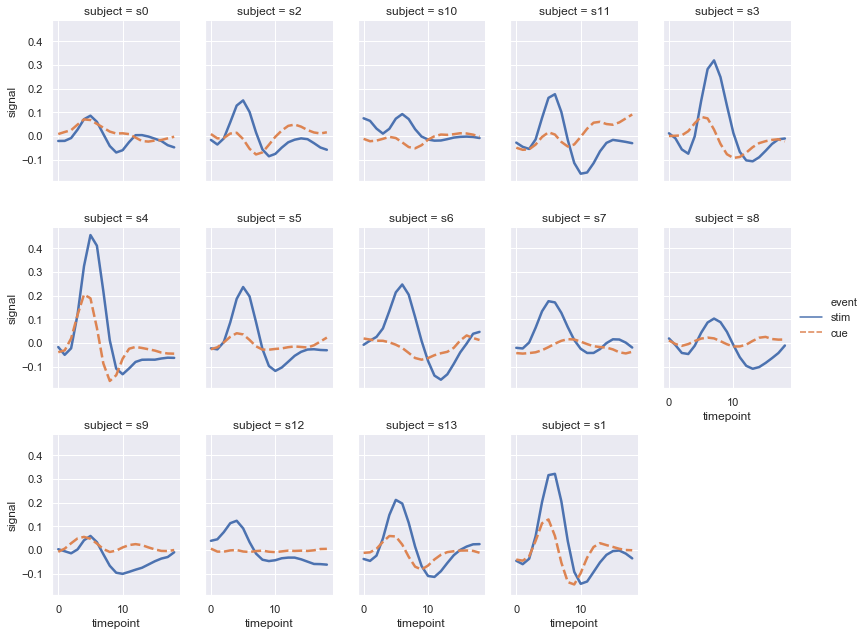

In [122]:
fmri = sb.load_dataset("fmri")
print(fmri[:10])
sb.relplot(x="timepoint", y="signal", kind="line", data=fmri)
sb.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)
sb.relplot(x="timepoint", y="signal", kind="line",hue="event", data=fmri)
sb.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

sb.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

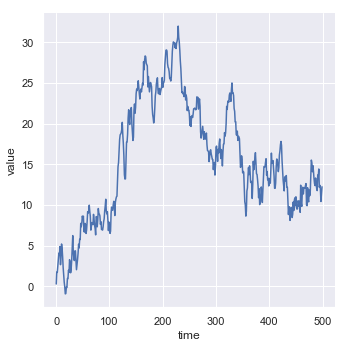

In [123]:
df = pd.DataFrame(dict(time=np.arange(500),
                         value = np.random.randn(500).cumsum(),
                       val2 = np.random.randn(500).cumsum()))

sb.relplot(x='time', y='value', data=df, kind="line")

